In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import json
import time
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

import requests

In [4]:
with open("all_data.json", "r") as read_file:
    data = json.load(read_file)

In [5]:
data

[{'main': {'person': {'id': 8,
    'name': 'Зюганов Геннадий Андреевич',
    'family_name': 'Зюганов',
    'given_name': 'Геннадий',
    'patronymic_name': 'Андреевич',
    'gender': 'M'},
   'office': {'id': 14,
    'name': 'Государственная Дума',
    'url': 'http://www.duma.gov.ru/',
    'type': {'id': 7, 'name': 'Федеральный, без региональной структуры'},
    'region': None},
   'party': {'id': 6, 'name': 'КПРФ'},
   'year': 2010,
   'document_type': {'id': 2, 'name': 'Предвыборная декларация'}},
  'incomes': [{'size': 2126487.0,
    'relative': None,
    'comment': 'пенсия,  Аппарат Государственной Думы Федерального собрания Российской Федерации, доходы от вкладов'}],
  'real_estates': [{'name': '',
    'square': 167.4,
    'country': 'Россия',
    'region': {'id': 63, 'name': 'Москва'},
    'comment': '',
    'type': {'id': 4, 'name': 'Квартира'},
    'own_type': {'id': 22, 'name': 'Совместная собственность'},
    'share': 0.25,
    'relative': None}],
  'vehicles': [],
  'savings

In [6]:
declarator = []
for element in data:
    try:
        id_person = element['main']['person']['id']
        name_person = element['main']['person']['name']
        gender_person = element['main']['person']['gender']
        office_id_person = element['main']['office']['id']
        office_name_person = element['main']['office']['name']
        if element['main']['office']['region'] == None:
            office_region_person_id = 0
            office_region_person_name = 0
        else:
            office_region_person_id = element['main']['office']['region']['id']
            office_region_person_name = element['main']['office']['region']['name']
        office_type_person_id = element['main']['office']['type']['id']
        office_type_person_name = element['main']['office']['type']['name']
        position_person = element['position_ru']
        year = element['main']['year']
        document_type_id = element['main']['document_type']['id']
        document_type_name = element['main']['document_type']['name']
        incomes_all=element['incomes']
        incomes=[]
        for item in incomes_all:
            incomes_relative=item['relative']
            if item['relative']:
                incomes_relative = item['relative']['id']
            else:
                incomes_relative = 0
            incomes.append([incomes_relative, item['size']])
        estates_all=element['real_estates']
        real_estates=[]
        for elements in estates_all:
            square = elements['square']
            if elements['share']:
                share = elements['share']
            else:
                share = 1
                
            if elements['region']:
                region = elements['region']['id']
            own_type_id=elements['own_type']['id']
            own_type2_id=elements['type']['id']
            relative_name=elements['relative']
            if relative_name:
                relative_name=elements['relative']['id']
            else:
                relative_name=0
            real_estates.append([square, share, region, own_type_id, own_type2_id, relative_name])
        vehicles=len(element['vehicles'])
        savings = element['savings']
        stocks = element['stocks']
        bonds = element['bonds']
        declarator.append([id_person, name_person, gender_person, office_id_person, office_name_person, office_region_person_id, office_region_person_name, office_type_person_id, office_type_person_name, position_person, 
                         year, document_type_id, document_type_name, incomes, real_estates, vehicles, savings, stocks, bonds])
    except KeyError:
        id_person = element['main']['main']['person']['id']
        name_person = element['main']['main']['person']['name']
        gender_person = element['main']['main']['person']['gender']
        office_id_person = element['main']['main']['office']['id']
        office_name_person = element['main']['main']['office']['name']
        if element['main']['main']['office']['region'] == None:
            office_region_person_id = 0
            office_region_person_name = 0
        else:
            office_region_person_id = element['main']['main']['office']['region']['id']
            office_region_person_name = element['main']['main']['office']['region']['name']
        office_type_person_id = element['main']['main']['office']['type']['id']
        office_type_person_name = element['main']['main']['office']['type']['name']
        position_person = element['main']['position_ru']
        year = element['main']['main']['year']
        document_type_id = element['main']['main']['document_type']['id']
        document_type_name = element['main']['main']['document_type']['name']
        incomes_all=element['main']['incomes']
        incomes=[]
        for item in incomes_all:
            incomes_relative=item['relative']
            if item['relative']:
                incomes_relative=item['relative']['id']
            else:
                incomes_relative = 0
            incomes.append([incomes_relative, item['size']])
        estates_all=element['main']['real_estates']
        real_estates=[]
        for elements in estates_all:
            square = elements['square']
            if elements['share']:
                share = elements['share']
            else:
                share = 1
            if elements['region']:
                region = elements['region']['id']
            own_type_id=elements['own_type']['id']
            own_type2_id=elements['type']['id']
            relative_name=elements['relative']
            if relative_name:
                relative_name=elements['relative']['id']
            else:
                relative_name=0
            real_estates.append([square, share, region, own_type_id, own_type2_id, relative_name])
        vehicles=len(element['main']['vehicles'])
        savings = element['main']['savings']
        stocks = element['main']['stocks']
        bonds = element['main']['bonds']
        declarator.append([id_person, name_person, gender_person, office_id_person, office_name_person, office_region_person, office_type_person_id, office_type_person_name, position_person, 
                         year, document_type_id, document_type_name, incomes, real_estates, vehicles, savings, stocks, bonds])
declarator

[[8,
  'Зюганов Геннадий Андреевич',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  [[0, 2126487.0]],
  [[167.4, 0.25, 63, 22, 4, 0]],
  0,
  ['2 652 390,0 руб. (ВТБ 24 (ЗАО))',
   '474 061,0 руб. (ОАО "Сбербанк России")'],
  [],
  []],
 [9,
  'Алферов Жорес Иванович',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  [[0, 8338604.93]],
  [[5000.0, 0.5, 1, 22, 1, 0],
   [7500.0, 1.0, 64, 20, 1, 0],
   [165.8, 0.5, 1, 22, 3, 0],
   [108.1, 1.0, 63, 20, 4, 0],
   [25.0, 1.0, 63, 20, 2, 0]],
  1,
  ['24 917 309,0 руб. (АКБ "Связь-Банк")',
   '10 039 098,0 руб. (ОАО "Альфа Банк")',
   '1 053 336,0 руб. (Филиал Закрытого акционерного общества "Коммерческий банк (Евразия)")'],
  [],
  []],
 [10,
  'Андреев Андрей Анатольевич',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный

In [12]:
declarations = []
for person in declarator:
    inc = 0
    inc_rel = 0
    for income in person[13]:
        inc += income[1]
        inc_rel += 1
    sq = 0
    sq_num = 0
    for estate in person[14]:
        if estate[0] != None:
            sq += estate[0] * estate[1]
            sq_num += 1
        else:
            sq = 0
    sav = person[16]
    s = 0
    if len(sav) != 0:
        for saving in sav:
            s += int(''.join(saving.split(',')[0].split()))   
    if sq_num == 0:
        if inc_rel == 0:
            declarations.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], inc, inc_rel,
                            sq, sq_num, person[15], s])
        else:
            declarations.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], inc // inc_rel, inc_rel,
                            sq, sq_num, person[15], s])
    else:
        if inc_rel == 0:
            declarations.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], inc, inc_rel,
                            sq // sq_num, sq_num, person[15], s])
        else:
            declarations.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], inc // inc_rel, inc_rel,
                            sq // sq_num, sq_num, person[15], s])
declarations

[[8,
  'Зюганов Геннадий Андреевич',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  2126487.0,
  1,
  41.0,
  1,
  0,
  3126451],
 [9,
  'Алферов Жорес Иванович',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  8338604.0,
  1,
  2043.0,
  5,
  1,
  36009743],
 [10,
  'Андреев Андрей Анатольевич',
  'M',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  2078056.0,
  1,
  0,
  0,
  1,
  14440],
 [11,
  'Апарина Алевтина Викторовна',
  'F',
  14,
  'Государственная Дума',
  0,
  0,
  7,
  'Федеральный, без региональной структуры',
  '',
  2010,
  2,
  'Предвыборная декларация',
  2133612.0,
  1,
  56.0,
  1,
  0,
  524008],
 [12,
  'Афонин Юрий Вячеславович',
  'M',
  14,
  'Государственная Дума',
 

In [23]:
declarations_ = []
for person in declarations:
    for income in person[13]:
        for estate in person[14]:
            if income[0] == estate[5] and income[1] != 0 and estate[0] != 0:
                declarations_.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], income[0], income[1],
                            estate[0], estate[1], estate[2], estate[3], estate[4], estate[5], person[15], person[16]])
            elif income[0] == 0 and estate[5] != 0 and estate[0] != 0 and income[1] != 0:
                declarations_.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], income[0], income[1],
                            estate[0], estate[1], estate[2], estate[3], estate[4], estate[5], person[15]])
            elif income[0] != 0 and estate[5] == 0 and income[1] != 0 and estate[0] != 0:
                declarations_.append([person[0], person[1], person[2], person[3], person[4], person[5], person[6], person[7], person[8], person[9], person[10], person[11], person[12], income[0], income[1],
                            estate[0], estate[1], estate[2], estate[3], estate[4], estate[5], person[15]])

TypeError: object of type 'float' has no len()

In [26]:
dec = pd.DataFrame(declarations, columns=['id', 'name', 'gender', 'office_id', 'office_name', 'region_id','region_name', 'office_type_id', 'office_type_name', 'position', 'year', 'document_id', 'document_name', 'income_size', 'relatives_income',
                                'square', 'estates_number', 'vehicles', 'savings'])

In [27]:
dec.shape

(280579, 19)

In [28]:
dec.fillna(0,inplace=True)
dec.isnull().any()

id                  False
name                False
gender              False
office_id           False
office_name         False
region_id           False
region_name         False
office_type_id      False
office_type_name    False
position            False
year                False
document_id         False
document_name       False
income_size         False
relatives_income    False
square              False
estates_number      False
vehicles            False
savings             False
dtype: bool

In [14]:
dec.to_excel('DATA.xlsx', encoding = 'utf-8')

In [29]:
df = pd.read_excel('DATA.xlsx', encoding = 'utf-8')

In [5]:
df.head()

Unnamed: 0    id                            name gender  office_id  \
0      198196   558  Евкуров Юнус-Бек Баматгиреевич      M        124   
1      198197   562      Темрезов Рашид Бориспиевич      M        126   
2      198356  3447    Набокин Дмитрий Владимирович      M        996   
3      198357  3448    Челышев Алексей Валентинович      M        991   
4      198497  7849     Алешин Николай Владимирович      M        989   

                                      office_name  region_id  \
0                      Глава республики Ингушетия          8   
1           Глава Карачаево-Черкесской республики         11   
2  Префектура Троицкого и Новомосковского округов         63   
3      Префектура Южного административного округа         63   
4  Префектура Восточного административного округа         63   

                       region_name  office_type_id  \
0             Республика Ингушетия              18   
1  Карачаево-Черкесская республика              18   
2                           Москва              13   
3                           Москва              13   
4                           Москва              24   

              office_type_name  \
0  Региональный, без структуры   
1  Региональный, без структуры   
2   Региональный со структурой   
3   Региональный со структурой   
4   Федеральный, со структурой   

                                            position  year  document_id  \
0                         Глава Республики Ингушетия  2018            1   
1              Глава Карачаево-Черкесской республики  2018            1   
2  Префект Троицкого и Новомосковского администра...  2018            1   
3  Префект Южного административного округа города...  2018            1   
4  Префект Восточного административного округа го...  2018            1   

                  document_name  income_size  relatives_income  square  \
0  Антикоррупционная декларация      1395048                 2     278   
1  Антикоррупционная декларация       859583                 2     455   
2  Антикоррупционная декларация      6141434                 2     599   
3  Антикоррупционная декларация      4934635                 2     468   
4  Антикоррупционная декларация      5461288                 2     337   

   estates_number  vehicles  
0              17         0  
1              22         1  
2               7         1  
3              11         2  
4              16         1

In [97]:
print(df['income_size'].mean())
print(df['income_size'].median())
print(df['income_size'].std())
print(df['income_size'].max())
print(df['income_size'].min())

3225560.200302157
989928.0
251416045.55983156
115253119846.0
0.0


In [103]:
print(df['relatives_income'].mean())
print(df['relatives_income'].median())
print(df['relatives_income'].std())
print(df['relatives_income'].max())
print(df['relatives_income'].min())

1.6914745258460395
2.0
0.5524274058667075
13
0


In [98]:
print(df['square'].mean())
print(df['square'].median())
print(df['square'].std())
print(df['square'].max())
print(df['square'].min())

45378.79191613983
78.0
8320716.073020322
3828500544.0
0.0


In [102]:
print(df['estates_number'].mean())
print(df['estates_number'].median())
print(df['estates_number'].std())
print(df['estates_number'].max())
print(df['estates_number'].min())

5.382665489029379
4.0
6.277652019496694
421
0


In [104]:
print(df['vehicles'].mean())
print(df['vehicles'].median())
print(df['vehicles'].std())
print(df['vehicles'].max())
print(df['vehicles'].min())

1.2128114540721457
1.0
2.011039557966634
205
0


In [110]:
df[df['vehicles'] ==df['vehicles'].max()]

id                      name gender  office_id  \
40089  12196  Палкин Андрей Васильевич      M        531   

                                      office_name  region_id  \
40089  Архангельское областное Собрание депутатов         37   

                 region_name  office_type_id             office_type_name  \
40089  Архангельская область              18  Региональный, без структуры   

                                                position  year  document_id  \
40089  Депутат Архангельского областного собрания деп...  2015            1   

                      document_name  income_size  relatives_income  square  \
40089  Антикоррупционная декларация  241732466.0                 2   684.0   

       estates_number  vehicles  
40089              97       205

In [33]:
income_regions = []
list_year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
list_regions = [0, 24, 33, 37, 38, 96, 35, 36, 41, 42, 43, 93, 44, 99, 45, 9, 46, 97,48,11,50,51,53,27,28,
                                       98,55,56,57,58,63,64,65,102,66,67,68,69,105,70,72,29,74,75,3,6,4,5,59,8,47,12,13,109,61,62,92,17,18,
                                        85,21,76,103,77,1,79,94,80,110,100,81,82,101,106,84,86,20,88,32,108,89,90,91,95,104,107]
for i in list_regions:
    dt = df[df['region_id']==i]
    income_year=[]
    for j in list_year: 
        dp = dt[dt['year']==j]
        a = np.median(dp['income_size'])
        income_year.append(a)
    income_regions.append(income_year)

In [35]:
incomes = pd.DataFrame(income_regions)

In [43]:
new_inc[new_inc['2018']==new_inc['2018'].max()]

region       2011       2012       2013  \
84  Ямало-Ненецкий автономный округ  1685776.0  1761783.0  1524686.0   

         2014       2015       2016       2017       2018  
84  3460772.0  3704884.5  1501115.5  1578710.0  6252535.0

In [42]:
new_inc.mean()

2011    1.208666e+06
2012    1.238666e+06
2013    9.337061e+05
2014    1.114901e+06
2015    1.146942e+06
2016    1.004258e+06
2017    1.017389e+06
2018    1.775969e+06
dtype: float64

In [144]:
new_inc.std()

2011    521774.771516
2012    462094.073282
2013    396032.883770
2014    450249.289207
2015    494409.972112
2016    560827.315122
2017    307476.835968
2018    920052.119287
dtype: float64

In [145]:
new_inc.median()

2011    1088050.75
2012    1230038.75
2013     817199.50
2014     974502.00
2015     997357.50
2016     869588.50
2017     907519.50
2018    1532823.00
dtype: float64

In [56]:
np.where(new_inc['2016'] == sorted(new_inc['2016'])[85])

(array([27], dtype=int64),)

In [65]:
dx = df[df['year'] == 2016]
dx[dx['region_name'] == 'Ленинградская область']

Unnamed: 0     id                          name gender  office_id  \
55923        55923   1413   Дрозденко Александр Юрьевич      M        108   
55924        55924  31665   Кучерявый Михаил Михайлович      M        180   
55925        55925  17249    Перминов Сергей Николаевич      M        180   
55926        55926  17244         Марков Роман Иванович      M        180   
55927        55927  17242    Бурлаков Андрей Дмитриевич      M        180   
55928        55928  17243    Емельянов Николай Петрович      M        180   
55929        55929  13403         Коваль Олег Сергеевич      M        180   
55930        55930  17245       Москвин Михаил Иванович      M        180   
55931        55931  17250      Ялов Дмитрий Анатольевич      M        180   
55932        55932  17251       Яхнюк Сергей Васильевич      M        180   
107135      107135  57881  Потапова Светлана Леонидовна      F        549   

                                           office_name  region_id  \
55923                 Губернатор Ленинградской области         56   
55924              Правительство Ленинградской области         56   
55925              Правительство Ленинградской области         56   
55926              Правительство Ленинградской области         56   
55927              Правительство Ленинградской области         56   
55928              Правительство Ленинградской области         56   
55929              Правительство Ленинградской области         56   
55930              Правительство Ленинградской области         56   
55931              Правительство Ленинградской области         56   
55932              Правительство Ленинградской области         56   
107135  Законодательное собрание Ленинградской области         56   

                  region_name  office_type_id             office_type_name  \
55923   Ленинградская область              18  Региональный, без структуры   
55924   Ленинградская область              18  Региональный, без структуры   
55925   Ленинградская область              18  Региональный, без структуры   
55926   Ленинградская область              18  Региональный, без структуры   
55927   Ленинградская область              18  Региональный, без структуры   
55928   Ленинградская область              18  Региональный, без структуры   
55929   Ленинградская область              18  Региональный, без структуры   
55930   Ленинградская область              18  Региональный, без структуры   
55931   Ленинградская область              18  Региональный, без структуры   
55932   Ленинградская область              18  Региональный, без структуры   
107135  Ленинградская область              18  Региональный, без структуры   

                                                 position  year  document_id  \
55923                    Губернатор Ленинградской области  2016            1   
55924   Вице-губернатор – руководитель аппарата губерн...  2016            1   
55925              Вице-губернатор по внутренней политике  2016            1   
55926   Первый заместитель председателя правительства ...  2016            1   
55927   Заместитель председателя правительства Ленингр...  2016            1   
55928   Заместитель председателя правительства Ленингр...  2016            1   
55929   Заместитель председателя правительства Ленингр...  2016            1   
55930   Заместитель председателя правительства Ленингр...  2016            1   
55931   Заместитель председателя правительства Ленингр...  2016            1   
55932   Заместитель председателя правительства Ленингр...  2016            1   
107135  председатель постоянной комиссии Законодательн...  2016            1   

                       document_name  income_size  relatives_income  square  \
55923   Антикоррупционная декларация     54503893                 2     670   
55924   Антикоррупционная декларация      1453342                 2     259   
55925   Антикоррупционная декларация      5861520                 2     399   
55926   Антикоррупционная декларация    

In [83]:
new_inc.T[84][0]

'Ямало-Ненецкий автономный округ'

In [45]:
new_inc.T[75][0]

'Тюменская область'

In [118]:
new_inc.T[41][0]

'Пермский край'

In [48]:
new_inc.T[58][0]

'Республика Татарстан'

In [50]:
new_inc.T[66][0]

'Сахалинская область'

In [11]:
list_regions_name = []
for region in dic:
    list_regions_name.append(region["name"])

In [39]:
incomes['region'] = list_regions_name
new_inc = incomes[['region', 0, 1, 2, 3, 4, 5, 6, 7]]
new_inc.rename(columns={0:'2011', 1:'2012', 2:'2013', 3:'2014', 4:'2015', 5:'2016', 6:'2017', 7:'2018'}, inplace=True)

In [40]:
new_inc.head()

region       2011       2012       2013       2014  \
0            Федеральный  1939358.5  2221234.0  2503795.5   875031.0   
1         Алтайский край   426667.5   558979.0   562607.0   803288.0   
2       Амурская область   770293.0   929348.5   954976.0  1106266.5   
3  Архангельская область   991869.0  1242661.0  1087651.0  1191759.0   
4   Астраханская область   855590.0   910240.5   684392.0  1074356.0   

        2015       2016       2017       2018  
0   849022.0   964853.0  1324533.0  3052172.0  
1   773745.5   763363.0   803865.0  1064753.0  
2  1119431.0  1244537.5  1329847.0  1709035.0  
3  1265289.0  1157571.0  1395214.0  1868614.0  
4  1201462.0   977230.0   905411.0  1495684.5

100%|█████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 288.39it/s]


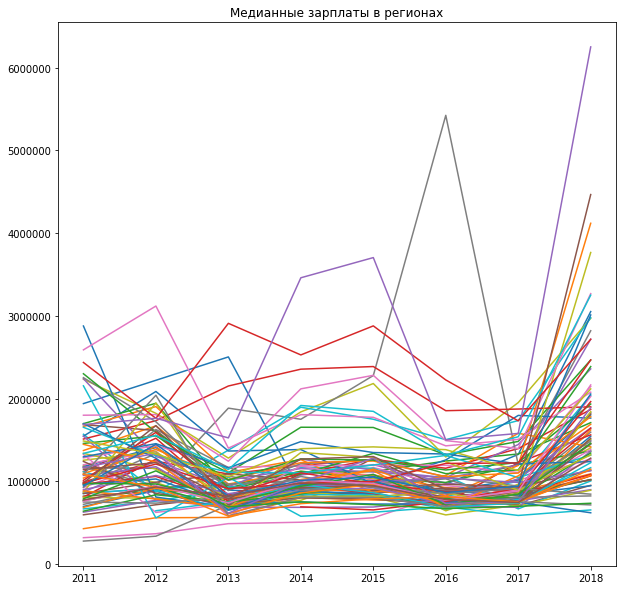

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
for i in tqdm(range(86)):
    ax.plot(new_inc.drop(['region'], axis=1).loc[i], label=new_inc.loc[i]['region'])
plt.title('Медианные зарплаты в регионах')
plt.show()
fig.savefig('Медианные зарплаты в регионах')

In [44]:
estate_regions = []
list_year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
list_regions = [0, 24, 33, 37, 38, 96, 35, 36, 41, 42, 43, 93, 44, 99, 45, 9, 46, 97,48,11,50,51,53,27,28,
                                       98,55,56,57,58,63,64,65,102,66,67,68,69,105,70,72,29,74,75,3,6,4,5,59,8,47,12,13,109,61,62,92,17,18,
                                        85,21,76,103,77,1,79,94,80,110,100,81,82,101,106,84,86,20,88,32,108,89,90,91,95,104,107]
for i in list_regions:
    dt = df[df['region_id']==i]
    estate_year=[]
    for j in list_year:
        dp = dt[dt['year']==j]
        a = np.median(dp['square'])
        estate_year.append(a)
    estate_regions.append(estate_year)

In [45]:
estates = pd.DataFrame(estate_regions)

In [13]:
new_estate.mean()

2011    392.810976
2012    261.428571
2013    103.500000
2014    189.100000
2015    200.170588
2016    159.610465
2017    168.534884
2018    293.441860
dtype: float64

In [14]:
new_estate.std()

2011    1345.616857
2012     177.246648
2013      64.282790
2014      90.717340
2015      92.350541
2016     103.389225
2017      80.767232
2018     126.479862
dtype: float64

In [15]:
new_estate.median()

2011    220.00
2012    229.50
2013     75.25
2014    192.00
2015    193.00
2016    145.50
2017    157.25
2018    296.75
dtype: float64

In [48]:
np.where(new_estate['2011'] == sorted(new_estate['2011'])[85])

(array([26], dtype=int64),)

In [51]:
new_estate.iloc[26]

region    Курская область
2011                12348
2012                350.5
2013                   84
2014                  316
2015                  296
2016                   75
2017                  235
2018                  321
Name: 26, dtype: object

In [54]:
dc = df[df['year'] == 2011]
dc[dc['region_name'] == 'Курская область']

Unnamed: 0    id                           name gender  office_id  \
3628        3628  1411  Михайлов Александр Николаевич      M        105   

                     office_name  region_id      region_name  office_type_id  \
3628  Губернатор Курской области         55  Курская область              18   

                 office_type_name                    position  year  \
3628  Региональный, без структуры  Губернатор Курской области  2011   

      document_id                 document_name  income_size  \
3628            1  Антикоррупционная декларация      1199548   

      relatives_income  square  estates_number  vehicles  
3628                 2   12348               6         1

In [127]:
new_estate.T[27][0]

'Ленинградская область'

In [130]:
new_estate.T[5][0]

'Белгородская область'

In [132]:
new_estate.T[41][0]

'Пермский край'

In [134]:
new_estate.T[42][0]

'Приморский край'

In [136]:
new_estate.T[49]

region    Республика Ингушетия
2012                       348
2013                       245
2014                     275.5
2015                       208
2016                       422
2017                       278
2018                       499
Name: 49, dtype: object

In [18]:
new_estate.T[81]

region    Чеченская республика
2011                     148.5
2012                        91
2013                     101.5
2014                     172.5
2015                       156
2016                     122.5
2017                       249
2018                       499
Name: 81, dtype: object

In [46]:
estates['region'] = list_regions_name
new_estate = estates[['region', 0, 1, 2, 3, 4, 5, 6, 7]]
new_estate.rename(columns={0:'2011', 1:'2012', 2:'2013', 3:'2014', 4:'2015', 5:'2016', 6:'2017', 7:'2018'}, inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 310.14it/s]


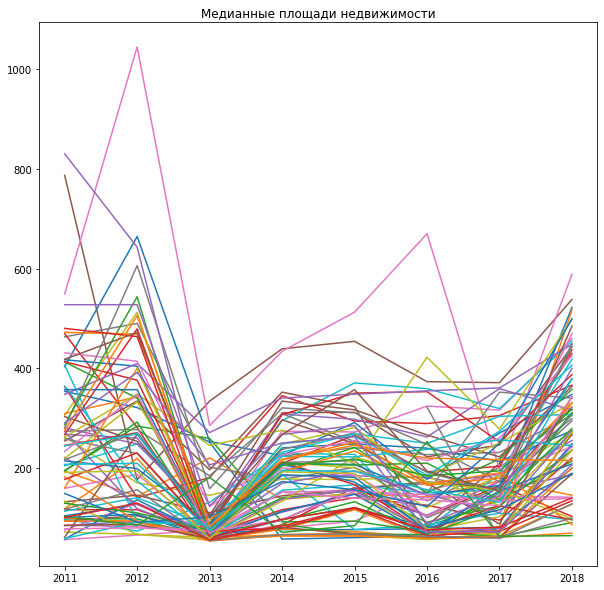

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
for i in tqdm(range(86)):
    if i != 26:
        ax.plot(new_estate.drop(['region'], axis=1).loc[i], label=new_estate.loc[i]['region'])
plt.title('Медианные площади недвижимости')
plt.show()
fig.savefig('Медианные площади недвижимости')

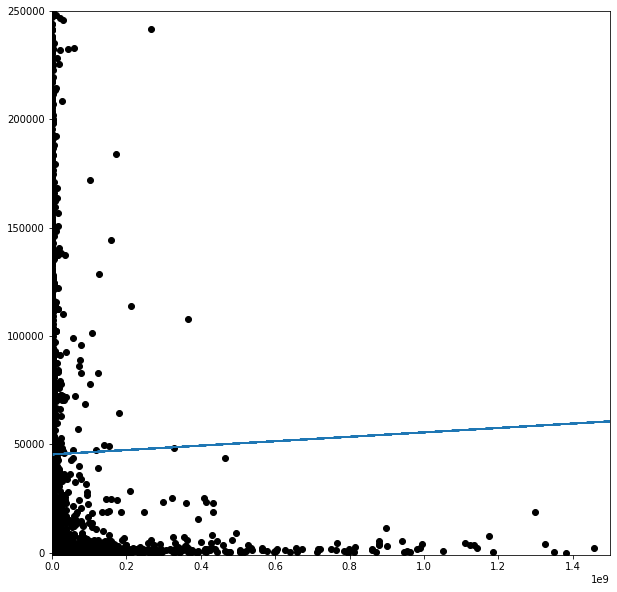

In [116]:
lr = LinearRegression()
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df['income_size'], df['square'], color='black')
income_train = df['income_size'][:, np.newaxis]
income_test = df['income_size'][:, np.newaxis]
square_train = df['square'][:]
square_test = df['square'][:]
lr.fit(income_train, square_train)
square_pred = lr.predict(income_test)
plt.plot(income_test, square_pred)
plt.xlim(right = 1.5e9)
plt.xlim(left = -1e3)
plt.ylim(bottom = -1e3)
plt.ylim(top = 2.5e5)
fig.savefig('Регрессия зарплаты-площадь')

In [66]:
list_office = list(set(df['office_type_name']))
list_office

['Федеральный, с региональной структурой',
 'Надрегиональный, без структуры',
 'Федеральный, со структурой',
 'Муниципальный, со структурой',
 'Федеральный, без региональной структуры',
 'Муниципальный, без структуры',
 'Региональный со структурой',
 'Региональный, без структуры',
 'Организация, без структуры',
 'Организация, c региональной структурой']

In [79]:
set(df[df['office_type_name'] == 'Организация, с региональной структурой']['office_name'])

set()

In [148]:
estate_regions = []
list_year = [2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in list_year:
    dt = df[df['year']==i]
    estate_year=[]
    for j in list_office:
        dp = dt[dt['office_type_name']==j]
        a = np.median(dp['income_size'])
        estate_year.append(a)
    estate_regions.append(estate_year)

In [149]:
incomes_doc = pd.DataFrame(estate_regions)
doc_incomes = incomes_doc.T

In [150]:
doc_incomes.fillna(0, inplace=True)
doc_incomes.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [161]:
new_doc.mean()

2008     392767.10
2009    1870979.45
2010    1457461.45
2011    1498406.65
2012    1365390.90
2013    1184747.15
2014    1591190.65
2015    1781125.05
2016    1150844.10
2017    1297924.80
2018    1995976.05
dtype: float64

In [162]:
new_doc.std()

2008    8.704618e+05
2009    2.612659e+06
2010    1.220677e+06
2011    1.066850e+06
2012    7.563827e+05
2013    8.340679e+05
2014    8.466959e+05
2015    1.388006e+06
2016    5.037827e+05
2017    6.264263e+05
2018    5.559500e+05
dtype: float64

In [163]:
new_doc.median()

2008          0.00
2009    1293207.00
2010    1430304.75
2011    1449193.00
2012    1476122.25
2013    1051092.25
2014    1357460.75
2015    1393628.75
2016    1221745.50
2017    1330623.25
2018    1909528.25
dtype: float64

In [151]:
doc_incomes['office'] = list_office
new_doc = doc_incomes[['office', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
new_doc.rename(columns={0:'2008', 1:'2009', 2:'2010', 3:'2011', 4:'2012', 5:'2013', 6:'2014', 7:'2015', 8:'2016', 9:'2017', 10:'2018'}, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00,  9.62it/s]


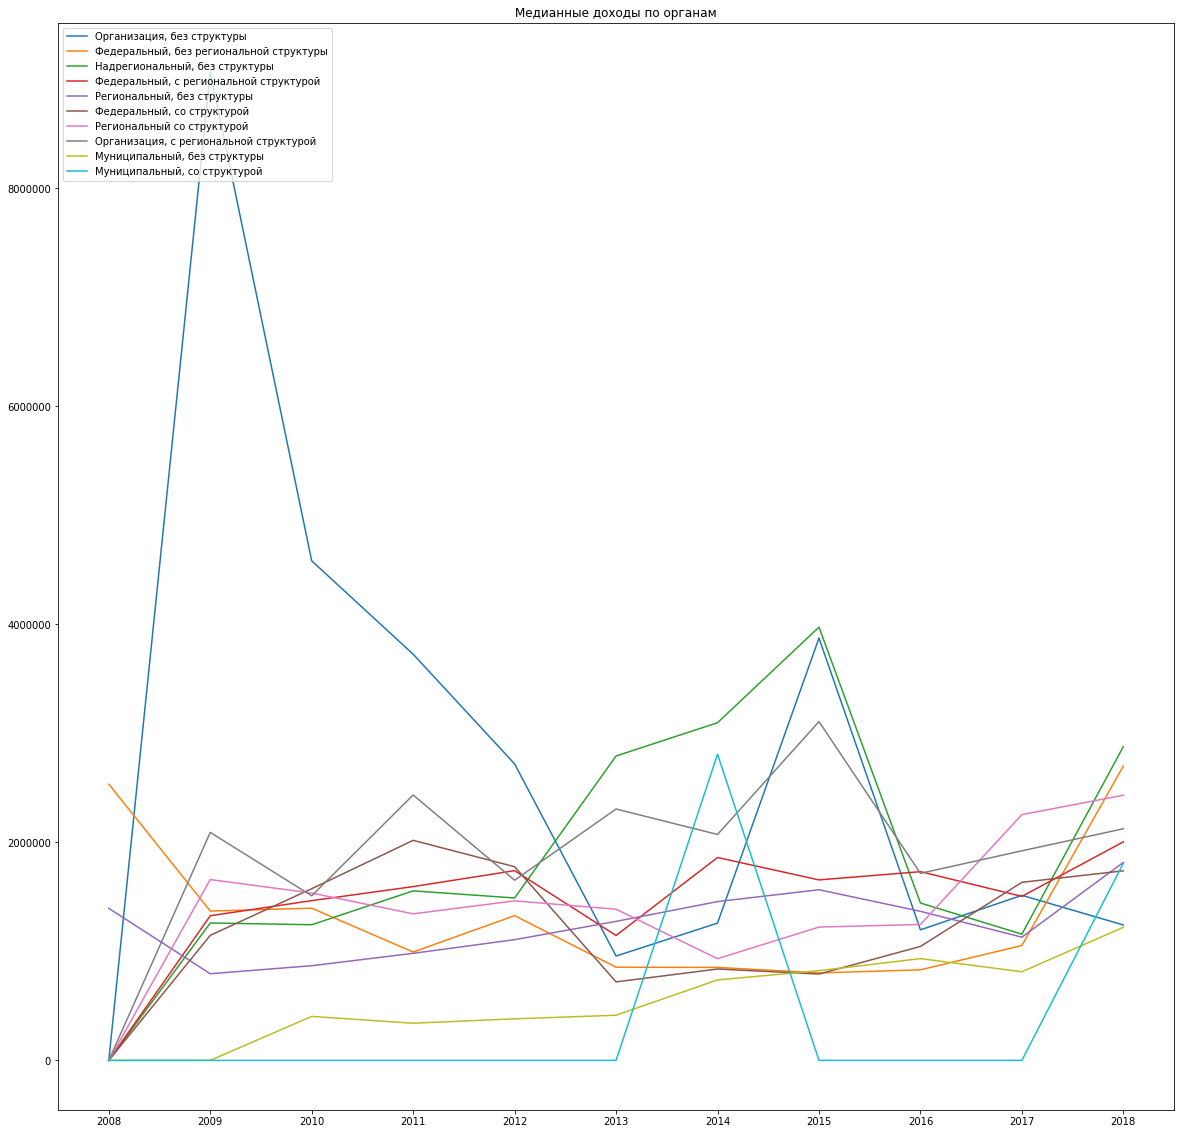

In [152]:
fig, ax = plt.subplots(figsize=(20,20))
for i in tqdm(range(10)):
    ax.plot(new_doc.drop(['office'], axis=1).loc[i], label=new_doc.loc[i]['office'])
leg=ax.legend(loc='upper left')
plt.title('Медианные доходы по органам')
plt.show()
fig.savefig('Медианные доходы по органам')

In [156]:
estate_regions = []
list_year = [2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in list_year:
    dt = df[df['year']==i]
    estate_year=[]
    for j in list_office:
        dp = dt[dt['office_type_name']==j]
        a = np.median(dp['square'])
        estate_year.append(a)
    estate_regions.append(estate_year)

In [157]:
incomes_doc = pd.DataFrame(estate_regions)
doc_square = incomes_doc.T

In [158]:
doc_square.fillna(0, inplace=True)
doc_square.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [164]:
new_doc2.mean()

2008    101.60
2009    218.85
2010    226.90
2011    220.70
2012    212.05
2013    141.95
2014    214.70
2015    184.60
2016    108.40
2017    138.70
2018    228.15
dtype: float64

In [165]:
new_doc2.std()

2008    214.204575
2009    144.515291
2010    135.869995
2011    118.352628
2012    112.666778
2013    117.817762
2014    139.394962
2015    135.179264
2016     58.097523
2017     91.356506
2018     86.958180
dtype: float64

In [166]:
new_doc2.median()

2008      0.0
2009    255.5
2010    231.5
2011    244.5
2012    202.5
2013     96.5
2014    175.0
2015    175.0
2016    109.5
2017    133.5
2018    222.0
dtype: float64

In [159]:
doc_square['office'] = list_office
new_doc2 = doc_square[['office', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
new_doc2.rename(columns={0:'2008', 1:'2009', 2:'2010', 3:'2011', 4:'2012', 5:'2013', 6:'2014', 7:'2015', 8:'2016', 9:'2017', 10:'2018'}, inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 217.97it/s]


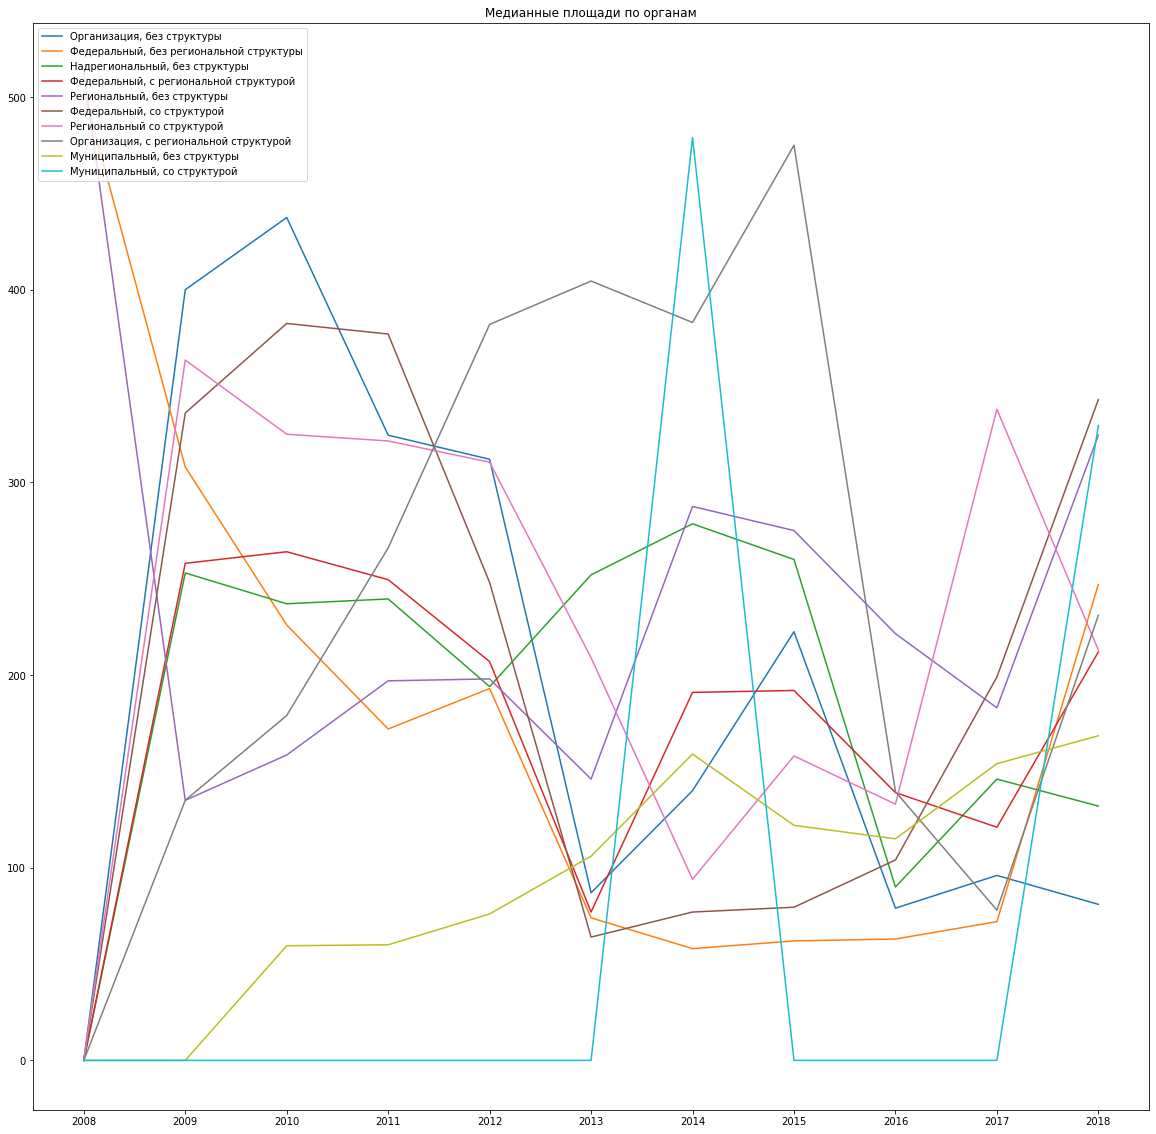

In [160]:
fig, ax = plt.subplots(figsize=(20,20))
for i in tqdm(range(10)):
    ax.plot(new_doc2.drop(['office'], axis=1).loc[i], label=new_doc2.loc[i]['office'])
leg=ax.legend(loc='upper left')
plt.title('Медианные площади по органам')
plt.show()
fig.savefig('Медианные площади по органам')

In [80]:
estate_regions = []
list_year = [2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in list_year:
    dt = df[df['year']==i]
    estate_year=[]
    for j in range(2):
        dp = dt[dt['document_id']== j+1]
        a = np.median(dp['income_size'])
        estate_year.append(a)
    estate_regions.append(estate_year)

In [81]:
incomes_doc = pd.DataFrame(estate_regions)
doc_square_1 = incomes_doc.T

In [82]:
list_doc = [1,2]

In [83]:
doc_square_1['document'] = list_doc
new_doc3 = doc_square_1[['document', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
new_doc3.rename(columns={0:'2008', 1:'2009', 2:'2010', 3:'2011', 4:'2012', 5:'2013', 6:'2014', 7:'2015', 8:'2016', 9:'2017', 10:'2018'}, inplace=True)

In [84]:
new_doc3

document       2008       2009       2010      2011      2012      2013  \
0         1  2388225.0  1032950.0   862296.5  859092.0  972500.0  907989.0   
1         2        NaN        NaN  2122157.0       NaN  429265.0       NaN   

        2014       2015       2016        2017       2018  
0   912455.0   918005.5  1005007.0   1157761.5  1537886.0  
1  2151879.0  2325464.5        NaN  35268087.5   344500.0

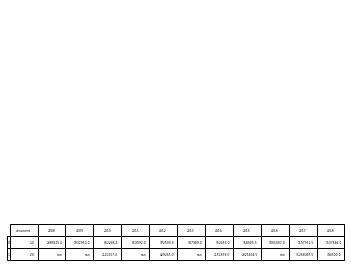

In [89]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, new_doc3)  # where df is your data frame

plt.savefig('mytable.png')

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

In [180]:
estate_regions = []
list_year = [2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
for i in list_year:
    dt = df[df['year']==i]
    estate_year=[]
    for j in range(3):
        dp = dt[dt['document_id']== j+1]
        a = np.median(dp['square'])
        estate_year.append(a)
    estate_regions.append(estate_year)

In [181]:
incomes_doc = pd.DataFrame(estate_regions)
doc_square_2 = incomes_doc.T

In [182]:
doc_square_2['document'] = list_doc
new_doc4 = doc_square_2[['document', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
new_doc4.rename(columns={0:'2008', 1:'2009', 2:'2010', 3:'2011', 4:'2012', 5:'2013', 6:'2014', 7:'2015', 8:'2016', 9:'2017', 10:'2018'}, inplace=True)

In [183]:
new_doc4

document   2008   2009   2010   2011   2012  2013   2014   2015  2016  \
0         1  504.0  225.0  160.0  174.0  175.0  87.0   65.0   76.0  74.0   
1         2    NaN    NaN  364.0    NaN  356.0   NaN  328.0  244.0   NaN   
2         3    NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   0.0   

    2017   2018  
0   97.0  227.0  
1  104.5   73.0  
2    NaN    NaN

In [ ]:
year2018=[[0, 0, 0], [24, 0, 0], [33, 0, 0], [37, 0, 0], [38, 0, 0], [96, 0, 0], [35, 0, 0], [36, 0, 0], [41, 0, 0],
         [42, 0, 0], [43, 0, 0], [93, 0, 0], [44, 0, 0], [99, 0, 0], [45, 0, 0], [9, 0, 0], [46, 0, 0], [97, 0, 0],
          [48, 0, 0], [11, 0, 0], [50, 0, 0], [51, 0, 0], [53, 0, 0], [27, 0, 0], [28, 0, 0], [98, 0, 0], [55, 0, 0],
          [56, 0, 0], [57, 0, 0], [58, 0, 0], [63, 0, 0], [64, 0, 0], [65, 0, 0], [102, 0, 0], [66, 0, 0], [67, 0, 0], 
          [68, 0, 0], [69, 0, 0], [105, 0, 0], [70, 0, 0], [72, 0, 0], [29, 0, 0], [74, 0, 0], [75, 0, 0], [3, 0, 0], 
          [6, 0, 0], [4, 0, 0], [5, 0, 0], [59, 0, 0], [8, 0, 0], [47, 0, 0], [12, 0, 0], [13, 0, 0], [109, 0, 0], 
          [61, 0, 0], [62, 0, 0], [92, 0, 0], [17, 0, 0], [18, 0, 0], [85, 0, 0], [21, 0, 0], [76, 0, 0], [103, 0, 0], 
          [77, 0, 0], [1, 0, 0], [79, 0, 0], [94, 0, 0], [80, 0, 0], [110, 0, 0], [100, 0, 0], [81, 0, 0], [82, 0, 0], 
          [101, 0, 0], [106, 0, 0], [84, 0, 0], [86, 0, 0], [20, 0, 0], [88, 0, 0], [32, 0, 0], [108, 0, 0], [89, 0, 0], 
          [90, 0, 0], [91, 0, 0], [95, 0, 0], [104, 0, 0], [107, 0, 0]]
for person in data:
    if person[8] == 2018:
        for income_region in year2018:
            if person[5] == income_region[0]:
                for incomes in person[9]:
                    income_region[1] += incomes[1]
                    income_region[2] += 1
year2018_average = []
for year in year2018:
    if year[2] != 0:
        year2018_average.append(year[1]//year[2])
    else:
         year2018_average.append(year[2])
income_table['2018'] = year2018_average
income_table.head()

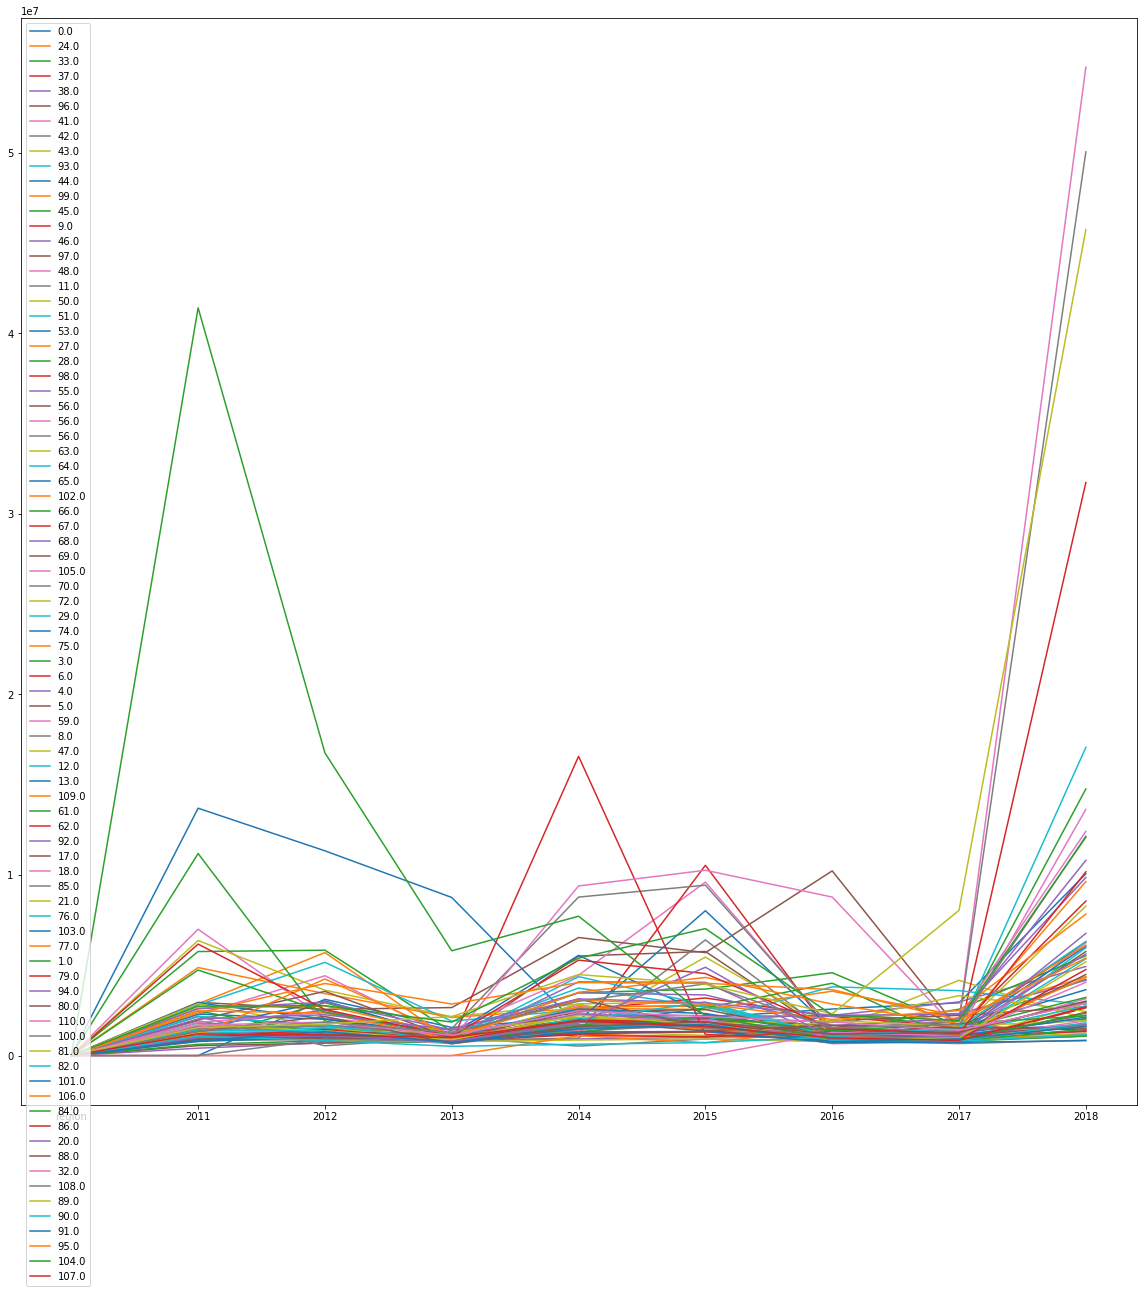

In [51]:
fig, ax = plt.subplots(figsize=(20,20))
for i in range(6):
    ax.plot(income_regions.loc[i], label=income_region.loc[i][0])
for i in range(8, 86):
    ax.plot(income_regions.loc[i], label=income_regions.loc[i][0])
leg=ax.legend(loc='upper left')
fig.savefig('зарплаты')

In [10]:
dic = [{
     "id": 0,
    "name": "Федеральный"
    },
    {
     "id": 24,
    "name": "Алтайский край"
    },
    {
        "id": 33,
        "name": "Амурская область"
    },
    {
        "id": 37,
        "name": "Архангельская область"
    },
    {
        "id": 38,
        "name": "Астраханская область"
    },
    {
        "id": 96,
        "name": "Белгородская область"
    },
    {
        "id": 35,
        "name": "Брянская область"
    },
    {
        "id": 36,
        "name": "Владимирская область"
    },
    {
        "id": 41,
        "name": "Волгоградская область"
    },
    {
        "id": 42,
        "name": "Вологодская область"
    },
    {
        "id": 43,
        "name": "Воронежская область"
    },
    {
        "id": 93,
        "name": "Еврейская автономная область"
    },
    {
        "id": 44,
        "name": "Забайкальский край"
    },
    {
        "id": 99,
        "name": "Ивановская область"
    },
    {
        "id": 45,
        "name": "Иркутская область"
    },
    {
        "id": 9,
        "name": "Кабардино-Балкарская Республика"
    },
    {
        "id": 46,
        "name": "Калининградская область"
    },
    {
        "id": 97,
        "name": "Калужская область"
    },
    {
        "id": 48,
        "name": "Камчатский край"
    },
    {
        "id": 11,
        "name": "Карачаево-Черкесская республика"
    },
    {
        "id": 50,
        "name": "Кемеровская область"
    },
    {
        "id": 51,
        "name": "Кировская область"
    },
    {
        "id": 53,
        "name": "Костромская область"
    },
    {
        "id": 27,
        "name": "Краснодарский край"
    },
    {
        "id": 28,
        "name": "Красноярский край"
    },
    {
        "id": 98,
        "name": "Курганская область"
    },
    {
        "id": 55,
        "name": "Курская область"
    },
    {
        "id": 56,
        "name": "Ленинградская область"
    },
    {
        "id": 57,
        "name": "Липецкая область"
    },
    {
        "id": 58,
        "name": "Магаданская область"
    },
    {
        "id": 63,
        "name": "Москва"
    },
    {
        "id": 64,
        "name": "Московская область"
    },
    {
        "id": 65,
        "name": "Мурманская область"
    },
    {
        "id": 102,
        "name": "Ненецкий автономный округ"
    },
    {
        "id": 66,
        "name": "Нижегородская область"
    },
    {
        "id": 67,
        "name": "Новгородская область"
    },
    {
        "id": 68,
        "name": "Новосибирская область"
    },
    {
        "id": 69,
        "name": "Омская область"
    },
    {
        "id": 105,
        "name": "Оренбургская область"
    },
    {
        "id": 70,
        "name": "Орловская область"
    },
    {
        "id": 72,
        "name": "Пензенская область"
    },
    {
        "id": 29,
        "name": "Пермский край"
    },
    {
        "id": 74,
        "name": "Приморский край"
    },
    {
        "id": 75,
        "name": "Псковская область"
    },
    {
        "id": 3,
        "name": "Республика Адыгея"
    },
    {
        "id": 6,
        "name": "Республика Алтай"
    },
    {
        "id": 4,
        "name": "Республика Башкортостан"
    },
    {
        "id": 5,
        "name": "Республика Бурятия"
    },
    {
        "id": 59,
        "name": "Республика Дагестан"
    },
    {
        "id": 8,
        "name": "Республика Ингушетия"
    },
    {
        "id": 47,
        "name": "Республика Калмыкия"
    },
    {
        "id": 12,
        "name": "Республика Карелия"
    },
    {
        "id": 13,
        "name": "Республика Коми"
    },
    {
        "id": 109,
        "name": "Республика Крым"
    },
    {
        "id": 61,
        "name": "Республика Марий Эл"
    },
    {
        "id": 62,
        "name": "Республика Мордовия"
    },
    {
        "id": 92,
        "name": "Республика Саха (Якутия)"
    },
    {
        "id": 17,
        "name": "Республика Северная Осетия — Алания"
    },
    {
        "id": 18,
        "name": "Республика Татарстан"
    },
    {
        "id": 85,
        "name": "Республика Тува (Тыва)"
    },
    {
        "id": 21,
        "name": "Республика Хакасия"
    },
    {
        "id": 76,
        "name": "Ростовская область"
    },
    {
        "id": 103,
        "name": "Рязанская область"
    },
    {
        "id": 77,
        "name": "Самарская область"
    },
    {
        "id": 1,
        "name": "Санкт-Петербург"
    },
    {
        "id": 79,
        "name": "Саратовская область"
    },
    {
        "id": 94,
        "name": "Сахалинская область"
    },
    {
        "id": 80,
        "name": "Свердловская область"
    },
    {
        "id": 110,
        "name": "Севастополь"
    },
    {
        "id": 100,
        "name": "Смоленская область"
    },
    {
        "id": 81,
        "name": "Ставропольский край"
    },
    {
        "id": 82,
        "name": "Тамбовская область"
    },
    {
        "id": 101,
        "name": "Тверская область"
    },
    {
        "id": 106,
        "name": "Томская область"
    },
    {
        "id": 84,
        "name": "Тульская область"
    },
    {
        "id": 86,
        "name": "Тюменская область"
    },
    {
        "id": 20,
        "name": "Удмуртская республика"
    },
    {
        "id": 88,
        "name": "Ульяновская область"
    },
    {
        "id": 32,
        "name": "Хабаровский край"
    },
    {
        "id": 108,
        "name": "Ханты-Мансийский автономный округ — Югра"
    },
    {
        "id": 89,
        "name": "Челябинская область"
    },
    {
        "id": 90,
        "name": "Чеченская республика"
    },
    {
        "id": 91,
        "name": "Чувашская республика - Чувашия"
    },
    {
        "id": 95,
        "name": "Чукотский автономный округ"
    },
    {
        "id": 104,
        "name": "Ямало-Ненецкий автономный округ"
    },
    {
        "id": 107,
        "name": "Ярославская область"
    }
]